[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Jumlah dokumen: 734
Contoh setelah preprocessing:
- bagus
- hallo aktif mbanking sulit pakai verifikasi wajah proses mudah terhubung ulang emosi beranta sistem mempermudah nasabah
- gangu cepat perbiki
- buka rekening udah berhasil bank aplikasi aplikasi pakai coba transfer mutasi bank berhasil hati pending trus saldo tunggu mohon perbaiki
- dipakai mamah ayah
Shape TF-IDF: (734, 475)


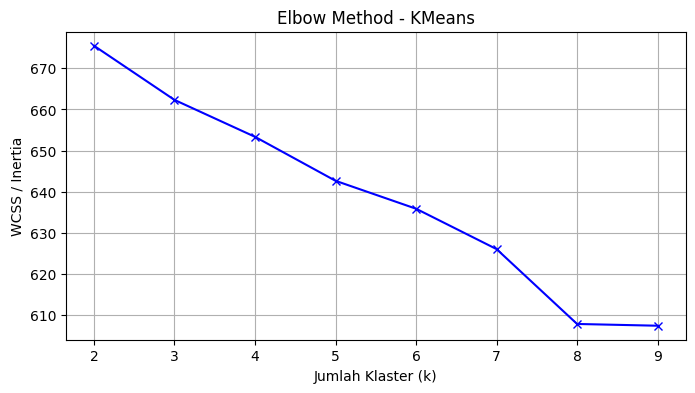


Contoh hasil clustering:
                                          Ulasan Uji  cluster
0                                              bagus        0
1  hallo kenapa sekarang aktif mbanking sulit har...        1
2                                gangu cepat perbiki        1
3  baru buka rekening disini udah berhasil setela...        1
4                            dipakai sama mamah ayah        1
5                                              bagus        0
6  registrasi berulang ulang pernah minta registr...        1
7                                            praktis        1
8              bagaimana cara agar notifikasi muncul        1
9                                        trima kasih        1


In [10]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

nltk.download('stopwords') # Add this line to download the stopwords

indo_stopwords = set(stopwords.words('indonesian'))

df = pd.read_csv("Bersih.csv")
texts = df["Ulasan Uji"].astype(str).tolist()

print("Jumlah dokumen:", len(texts))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Zá-źÁ-Ź ]', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in indo_stopwords and len(t) > 2]
    return " ".join(tokens)

clean_docs = [preprocess(t) for t in texts]

print("Contoh setelah preprocessing:")
for d in clean_docs[:5]:
    print("-", d)

tfidf = TfidfVectorizer(
    max_df=0.8,   # abaikan kata yg muncul di >80% dokumen
    min_df=2      # kata minimal muncul di 2 dokumen
)
tfidf_matrix = tfidf.fit_transform(clean_docs)

print("Shape TF-IDF:", tfidf_matrix.shape)

from sklearn.cluster import KMeans

inertia_values = []
K = range(2, 10)

for k in K:
    kmeanModel = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeanModel.fit(tfidf_matrix)
    inertia_values.append(kmeanModel.inertia_)  # WCSS / SSE

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method - KMeans')
plt.grid(True)
plt.show()

k_opt = 3
kmeans_final = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=10
)
labels = kmeans_final.fit_predict(tfidf_matrix)

df["cluster"] = labels

print("\nContoh hasil clustering:")
print(df[["Ulasan Uji", "cluster"]].head(10))

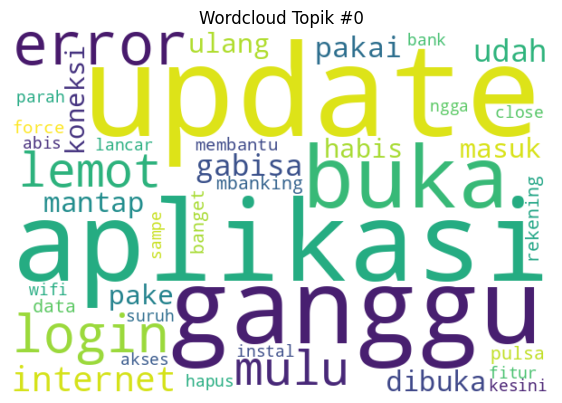

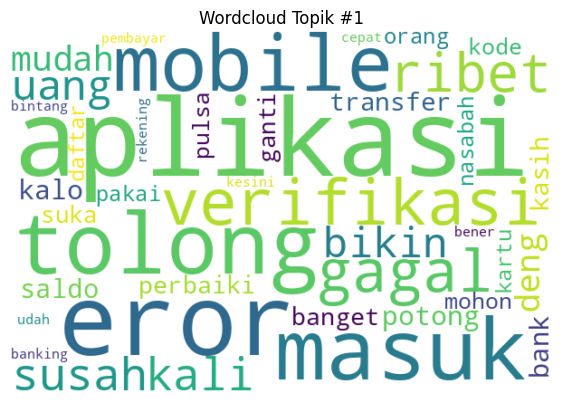

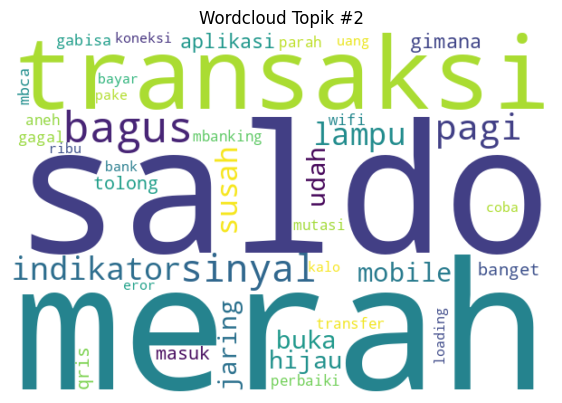

In [11]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming clean_docs is available from a previous cell
# Define CountVectorizer and perform LDA to get 'lda' and 'vocab'
count_vec = CountVectorizer(max_df=0.8, min_df=2)
count_matrix = count_vec.fit_transform(clean_docs)

n_topics = 3 # Use the same number of topics as in the previous example
lda = LatentDirichletAllocation(n_components=n_topics,
                                random_state=42)
lda.fit(count_matrix)

vocab = count_vec.get_feature_names_out()

for t, topic in enumerate(lda.components_):
    freqs = {vocab[i]: topic[i] for i in topic.argsort()[-40:]}
    wc = WordCloud(background_color="white",
                   width=600,
                   height=400).generate_from_frequencies(freqs)

    plt.figure(figsize=(7,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Topik #{t}")
    plt.show()